<a href="https://colab.research.google.com/github/tomblue01/UTAI/blob/main/s2_AIML_ML_Project_full_code_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.

!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

In [2]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

## Loading the dataset

In [4]:
# mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load data
data = pd.read_csv('/content/drive/MyDrive/AIUT/Course work/Semester 2/Project/Loan_Modelling.csv')

# Ensure the data loaded
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# Make a copy of data
df = data.copy()

# validate the copy worked
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Overview

### Check Dataset Structure

In [7]:
# Check number of rows and columns
num_rows, num_cols = df.shape
print(f"The dataset contains {num_rows} rows and {num_cols} columns.")



The dataset contains 5000 rows and 14 columns.


In [ ]:
# Display column data types and missing values
print("\nDataset Information:")
df.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations**
* All datatypes are numeric
* no missing data in any of the columns

In [ ]:
# Display the first few rows
print("\nFirst 5 rows of the dataset:")
display(df.head())

print()

# Display the last few rows
print("\nLast 5 rows of the dataset:")
display(df.tail())



First 5 rows of the dataset:


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1




Last 5 rows of the dataset:


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### Check for Duplicates

In [ ]:
# Count duplicate rows
num_duplicates = df.duplicated().sum()
print(f"There are {num_duplicates} duplicate rows in the dataset.")

# Display duplicate rows if any exist
if num_duplicates > 0:
    print("\nSample duplicate rows:")
    display(df[df.duplicated()].head())
else:
    print("No duplicate rows found.")


There are 0 duplicate rows in the dataset.
No duplicate rows found.


### Check for Missing Values and Display

In [ ]:
# Count missing values per column
missing_values = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).round(2)

# Combine counts and percentages into a readable format
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_df = missing_df[missing_df["Missing Values"] > 0]  # Filter only columns with missing values

if missing_df.empty:
    print("No missing values detected in the dataset.")
else:
    print("Columns with missing values:")
    display(missing_df)


No missing values detected in the dataset.


### Check for Inconsistencies

In [ ]:
# Check if Experience is greater than Age
invalid_experience = df[df["Experience"] > df["Age"]]
if not invalid_experience.empty:
    print(f"Found {len(invalid_experience)} cases where Experience is greater than Age.")
    display(invalid_experience)
else:
    print("No inconsistencies found where Experience is greater than Age.")

# Check for invalid ZIP Code lengths (not 5 digits)
invalid_zip = df[df["ZIPCode"].astype(str).str.len() != 5]
if not invalid_zip.empty:
    print(f"Found {len(invalid_zip)} invalid ZIP codes (not 5 digits).")
    display(invalid_zip)
else:
    print("All ZIP codes appear to have valid lengths.")


No inconsistencies found where Experience is greater than Age.
All ZIP codes appear to have valid lengths.


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### Univariate Analysis

#### Check Basic Statistics

In [10]:
# Summary statistics excluding irrelevant fields, rounded to 2 decimal places
print("Summary statistics for numerical features (excluding 'ID' and 'ZIPCode'):")
display(df.drop(columns=["ID", "ZIPCode", "Education", "Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard"]).describe().apply(lambda s: s.apply(lambda x: format(x, '.2f'))))


# No category objects exist, can skip this
# Summary statistics for categorical columns
# print("\nSummary statistics for categorical features:")
# display(df.describe(include='object'))

# Unique values per column
print("\nNumber of unique values per column:")
unique_counts = df.nunique()
for col, count in unique_counts.items():
    print(f" - {col}: {count} unique values")


Summary statistics for numerical features (excluding 'ID' and 'ZIPCode'):


,Age,Experience,Income,Family,CCAvg,Mortgage
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,45.34,20.10,73.77,2.40,1.94,56.50
std,11.46,11.47,46.03,1.15,1.75,101.71
min,23.00,-3.00,8.00,1.00,0.00,0.00
25%,35.00,10.00,39.00,1.00,0.70,0.00
50%,45.00,20.00,64.00,2.00,1.50,0.00
75%,55.00,30.00,98.00,3.00,2.50,101.00
max,67.00,43.00,224.00,4.00,10.00,635.00



Number of unique values per column:
 - ID: 5000 unique values
 - Age: 45 unique values
 - Experience: 47 unique values
 - Income: 162 unique values
 - ZIPCode: 467 unique values
 - Family: 4 unique values
 - CCAvg: 108 unique values
 - Education: 3 unique values
 - Mortgage: 347 unique values
 - Personal_Loan: 2 unique values
 - Securities_Account: 2 unique values
 - CD_Account: 2 unique values
 - Online: 2 unique values
 - CreditCard: 2 unique values


### Review Distributions, Media and Outliers

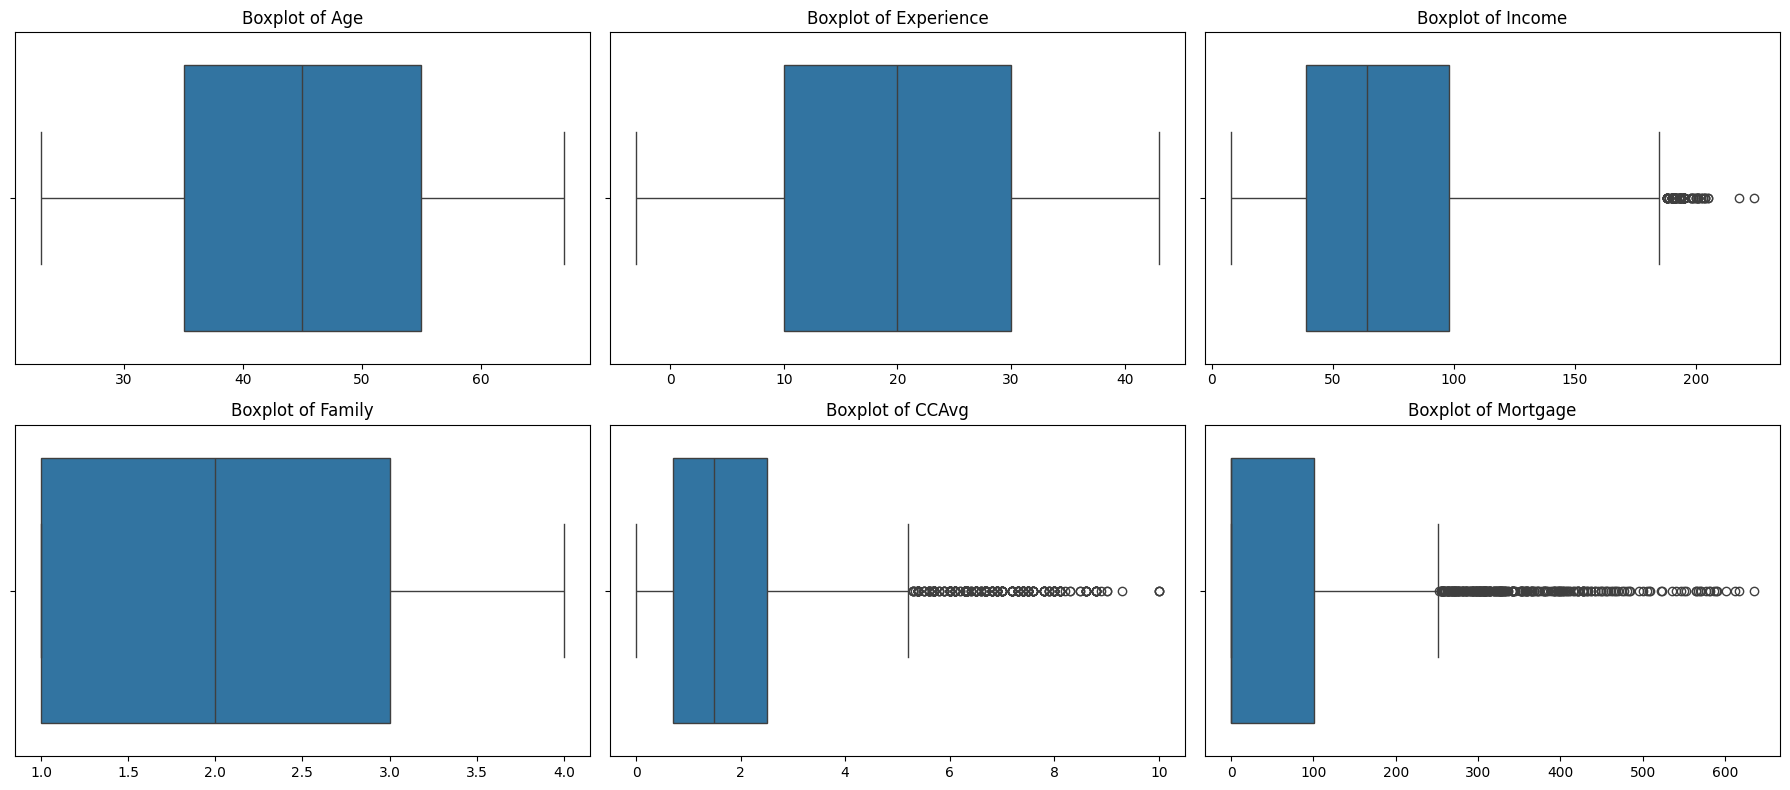

In [12]:
# List of features to plot
features = ["Age", "Experience", "Income", "Family", "CCAvg", "Mortgage"]

# Set up a 2x3 grid for 6 boxplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
axes = axes.flatten()  # Flatten to easily index

# Create each boxplot
for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f"Boxplot of {feature}")
    axes[i].set_xlabel("")  # Optional: remove x-axis label for a cleaner look

# Adjust layout
plt.tight_layout()
plt.show()


### **Question 1**

What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

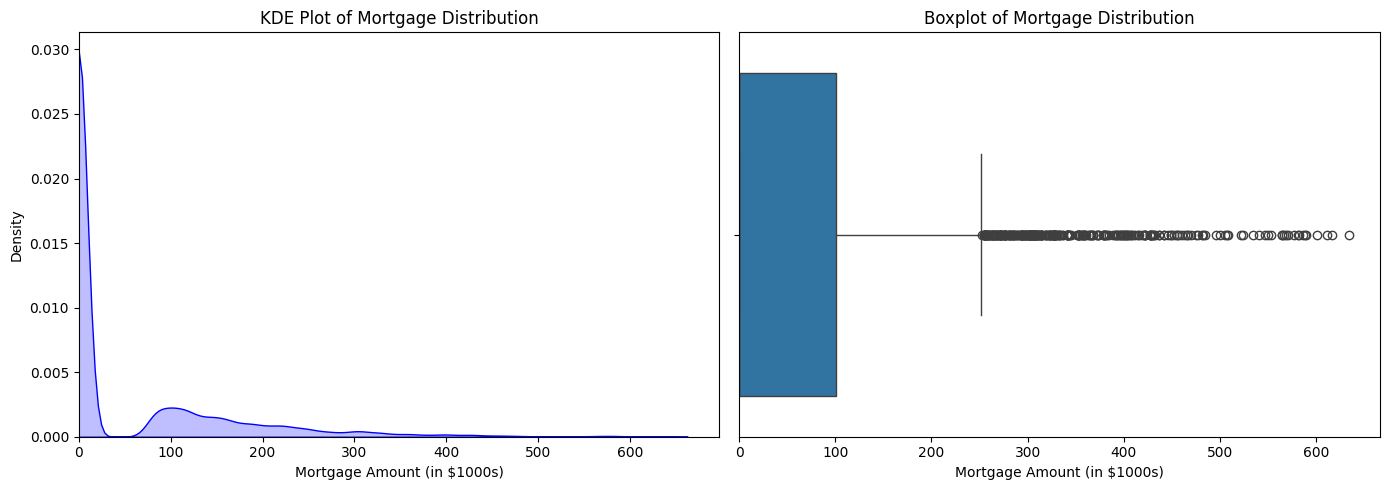

In [20]:
# Set up figure with two subplots (KDE plot & Boxplot)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# KDE Plot
sns.kdeplot(df["Mortgage"], fill=True, color="blue", bw_adjust=0.5, ax=axes[0])
axes[0].set_xlim(0, None)  # Ensure x-axis starts at 0
axes[0].set_xlabel("Mortgage Amount (in $1000s)")
axes[0].set_ylabel("Density")
axes[0].set_title("KDE Plot of Mortgage Distribution")

# Boxplot
sns.boxplot(x=df["Mortgage"], ax=axes[1])
axes[1].set_xlim(0, None)  # Keep consistency with KDE plot
axes[1].set_xlabel("Mortgage Amount (in $1000s)")
axes[1].set_title("Boxplot of Mortgage Distribution")

# Adjust layout for clarity
plt.tight_layout()
plt.show()


In [18]:
# What is the smallest mortgage amount?

min_mortgage = df["Mortgage"].min()
print(f"The smallest mortgage amount in the dataset is: {min_mortgage}")


The smallest mortgage amount in the dataset is: 0


**Observations**

* By far, the majority of customers have no mortgage. This is probably due to the fact most of them rent, or perhaps a few have their mortages paid off.
* The interquartile range (IQR) (box portion)is concentrated in the lower mortgage values.
* The median is close to zero, meaning more than half of the customers have very low or no mortgage at all.
* The whiskers extend moderately, showing some customers with mid-range mortgage amounts.
* There is a significant number of extreme outliers beyond the upper whisker, with many mortgages extending well beyond 300K, reaching values above 600K.
* These high mortgage values project a long right tail (right-skewed distribution).
* There is a sharp contrast between customers with low/no mortgages and those with very high mortgages.

### **Question 2**
How many customers have credit cards?

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

## Model Building

### Model Evaluation Criterion

*


### Model Building

## Model Performance Improvement

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___